In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
url = '/content/london_merged.csv'
data = pd.read_csv(url)

data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [7]:
# Display basic information about the dataset
data.info()

# Display summary statistics
data.describe()

# Check for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

# **Exploratory Data Analysis (EDA):**
Visualizations:

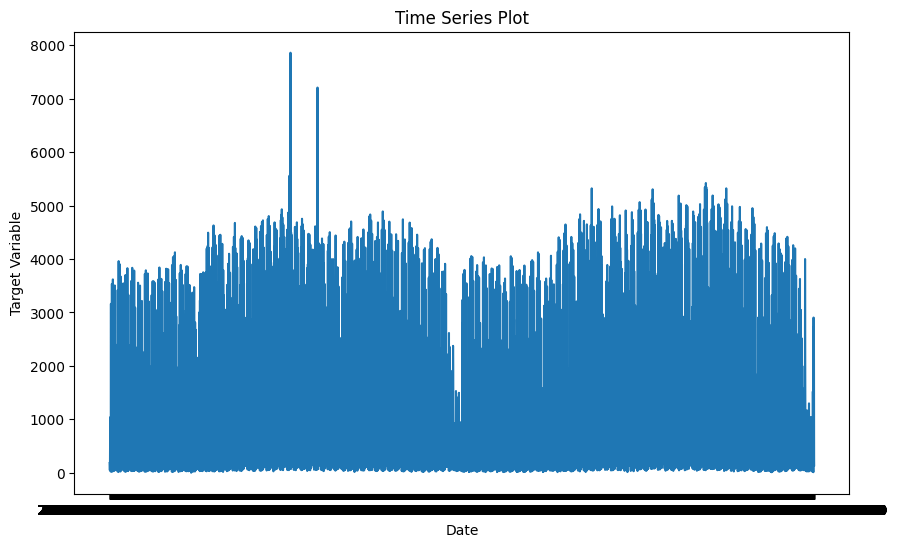

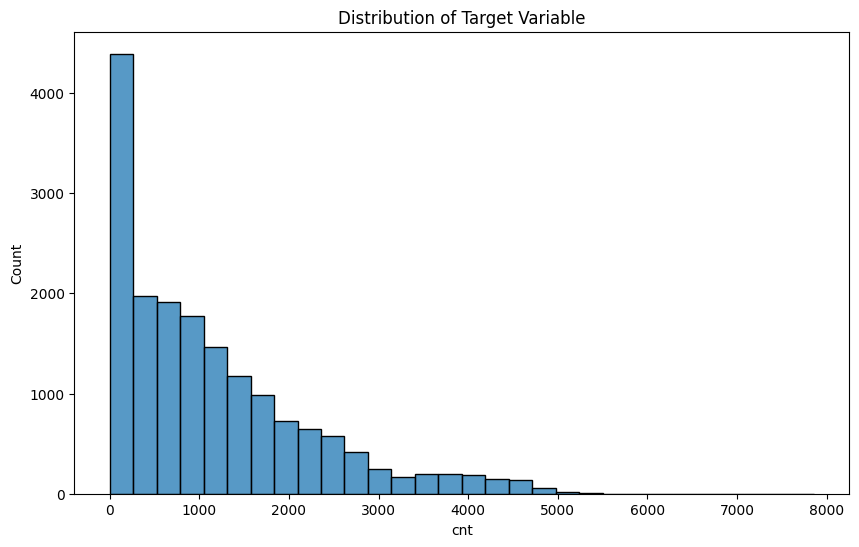

ValueError: ignored

<Figure size 1000x600 with 0 Axes>

In [8]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot time series data
plt.figure(figsize=(10,6))
plt.plot(data['timestamp'], data['cnt'])  # Replace 'date_column' and 'target_column' with the actual column names
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.show()

# Plot distribution of target variable
plt.figure(figsize=(10,6))
sns.histplot(data['cnt'], bins=30)  # Replace 'target_column' with the actual column name
plt.title('Distribution of Target Variable')
plt.show()

# Plot scatter plot for spatial data
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude_column', y='latitude_column', data=data)  # Replace 'longitude_column' and 'latitude_column' with the actual column names
plt.title('Spatial Plot')
plt.show()


Statistical Analysis:

In [ ]:
# Calculate and display summary statistics
print(data.describe())


# **Data Preprocessing and Cleaning:**
Handling Missing Values:

In [ ]:
# Check for missing values
print(data.isnull().sum())



In [ ]:
pip install h2o

In [8]:
# Use AutoML to build machine learning models
# You can use popular AutoML libraries like H2O, TPOT, or Auto-sklearn
# Here's an example of how to use H2O for AutoML

import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

# Convert the data to an H2O frame
h2o_data = h2o.H2OFrame(data)

# Split the data into training and testing sets
train, test = h2o_data.split_frame(ratios=[0.8])

# Identify predictors and response
x = train.columns
y = 'cnt'  # Replace 'target_variable' with the name of your target variable
x.remove(y)

# Run H2O AutoML
aml = H2OAutoML(max_runtime_secs=600, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmphgvozrds
  JVM stdout: /tmp/tmphgvozrds/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmphgvozrds/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_om7y4w
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_1_20231029_12431,811.711,658875,546.981,nan,658875
StackedEnsemble_AllModels_2_AutoML_1_20231029_12431,835.588,698206,578.471,nan,698206
StackedEnsemble_AllModels_1_AutoML_1_20231029_12431,837.389,701221,578.953,nan,701221
StackedEnsemble_BestOfFamily_4_AutoML_1_20231029_12431,838.471,703034,582.775,nan,703034
StackedEnsemble_BestOfFamily_2_AutoML_1_20231029_12431,843.24,711053,583.054,nan,711053
XGBoost_grid_1_AutoML_1_20231029_12431_model_3,844.226,712717,589.957,nan,712717
StackedEnsemble_BestOfFamily_1_AutoML_1_20231029_12431,844.247,712753,588.621,nan,712753
StackedEnsemble_BestOfFamily_3_AutoML_1_20231029_12431,845.782,715347,589.728,nan,715347
XGBoost_grid_1_AutoML_1_20231029_12431_model_4,846.837,717132,577.793,nan,717132
XGBoost_grid_1_AutoML_1_20231029_12431_model_15,846.921,717275,591.265,nan,717275


In [9]:
# Convert datetime columns to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract numeric features from datetime columns
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour

data = data.drop('timestamp', axis=1)

In [11]:
# Prepare the data for modeling
X = data.drop('cnt', axis=1)  # Replace 'target_variable' with the name of your target variable
y = data['cnt']  # Replace 'target_variable' with the name of your target variable

# Label encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Use an ensemble model to combine predictions from multiple models
# You can use popular ensemble methods like Random Forest, Gradient Boosting, or Stacking
# Here's an example of how to use a Random Forest ensemble model

from sklearn.ensemble import RandomForestClassifier

#data['cnt'] = data['cnt'].astype('category').cat.codes
# Prepare the data for modeling
X = data.drop('cnt', axis=1)  # Replace 'target_variable' with the name of your target variable
y = data['cnt']  # Replace 'target_variable' with the name of your target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest ensemble model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))
